НЕМНОГО ОБ EXCEL

→ Excel-файлы представляют из себя таблицы с данными и имеют формат XLS или  XLSX. В отличие от CSV-файлов, которые также позволяют удобно представлять табличные данные, XLS- и XLSX-файлы могут помимо данных включать формулы, изображения, графики и содержат информацию о форматировании.

Файл Excel называется рабочей книгой. Каждая книга может хранить некоторое количество листов. Лист, просматриваемый пользователем в данный момент, называется активным. Лист состоит из столбцов (адресуемых, как правило, с помощью букв, начиная с A) и строк (адресуемых с помощью цифр, начиная с 1). Лист может содержать данные в виде таблиц, формул, изображений, графиков и информации о форматировании.

XLS- и XLSX не являются текстовыми файлами. Вы наверняка хотя бы раз в жизни сталкивались с таблицами Excel, и, скорее всего, работали с ними в Microsoft Office, Open Office (бесплатный аналог Microsoft Office) или онлайн, используя Google Таблицы. Давайте научимся делать это с помощью pandas.

В этом разделе будут рассмотрены функции read_excel() и to_excel() из библиотеки pandas. С их помощью можно считывать данные из файлов Excel и выполнять запись в них. С помощью различных параметров есть возможность менять поведение функций, создавая нужные файлы, а не просто копируя содержимое из объекта DataFrame.

СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL

Подобно уже хорошо нам известной функции read_csv(), в pandas предусмотрена функция для удобного чтения XLS- и XLSX- файлов: read_excel() (англ. читать_Excel). Синтаксис обеих функций практически идентичен.

✍️ Для примера попробуем открыть файл grades.xlsx, содержащий оценки студентов за прослушанные курсы. Скачайте его и скопируйте в папку data.

Попробуем прочитать наш файл-пример. Для этого передадим в read_excel() путь к нему. Чтобы его открыть и сохранить данные в переменную grades, необходимо выполнить следующий код:

In [1]:
import pandas as pd

In [2]:
grades = pd.read_excel('grades.xlsx')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Так же, как и read_csv(), функция read_excel() может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

ЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL ПО ССЫЛКЕ

Если файл находится в открытом доступе по ссылке (например, на Google Диске или GitHub), его можно прочитать и из интернета — для этого достаточно в функции read_excel() вместо пути до файла указать ссылку на файл. Например:

In [3]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx')
display(data)

,January 2020 Sales,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Global Sales Report,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Location,Oranges,Apples,Bananas,Blueberries,Total
3,Toronto,7651,4422,8580,3679,24332
4,Los Angeles,273,2998,9890,7293,20454
5,Atlanta,3758,6752,4599,4149,19258
6,New York,4019,8796,8486,9188,30489


Основные параметры метода read_excel()

io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.

sheet_name —  ссылка на лист в Excel-файле (возможные значения данного параметра: 0 — значение по умолчанию, загружается первый лист; 'Sheet1' — можно передать название листа; обычно листы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).

na_values — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — Maths и ML.

По умолчанию в DataFrame читается информация из первого листа, однако read_excel()  позволяет выбрать, из какого именно листа загружать данные. Сделать это можно с помощью параметра sheet_name (рус. имя_листа). Например, чтобы прочесть данные из второго листа (ML) файла, выполним код:

In [4]:
grades = pd.read_excel('grades.xlsx', sheet_name='ML')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9


In [5]:
grades = pd.read_excel('grades.xlsx', sheet_name='Maths')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


ВЫГРУЗКА ДАННЫХ ИЗ DATAFRAME В EXCEL-ФАЙЛ

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в Excel-файл.

Для этого в pandas есть функция to_excel() (рус. в_Excel), принцип работы которой очень схож с функцией to_csv():

In [6]:
grades.to_excel('grades_new.xlsx') # Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data

В этом случае будет создан один лист с именем по умолчанию "Sheet1". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, Example) и не сохранять индекс, в метод  to_excel() необходимо передать параметры sheet_name='Example' и index=False:

In [7]:
 grades.to_excel('grades_new.xlsx', sheet_name='Example', index=False) 
 # Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data

Продвинутая работа с файлами Excel в Python предполагает использование дополнительных библиотек, таких как:

openpyxl — рекомендуемый пакет для чтения и записи файлов Excel 2010+ (например, xlsx);

xlsxwriter — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате Excel 2010+ (например, xlsx);
pyxlsb — пакет позволяет читать файлы Excel в xlsb-формате;

pylightxl — пакет позволяет читать xlsx- и xlsm-файлы и записывать xlsx-файлы;

xlrd — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, xls);

xlwt — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, xls).

✍️ Для выполнения следующего задания вам потребуется файл ratings+movies.

xlsx, содержащий два листа с данными: ratings (таблица с информацией о выставленных оценках) и movies (таблица c расшифровками идентификаторов кинофильмов). Скачайте его и посмотрите, как он выглядит.

ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [8]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas

with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
df = pd.DataFrame(recipes) # Создаём объект DataFrame из списка recipes
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


ДОПОЛНИТЕЛЬНО
Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

In [9]:
import pandas as pd # Импортируем модуль pandas
df = pd.read_json('recipes.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [10]:
df.shape

(500, 3)

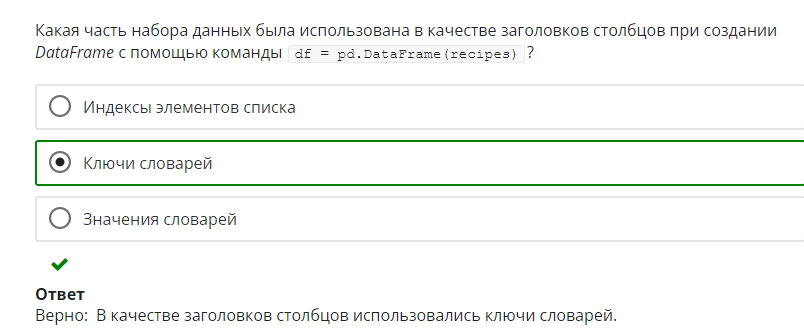

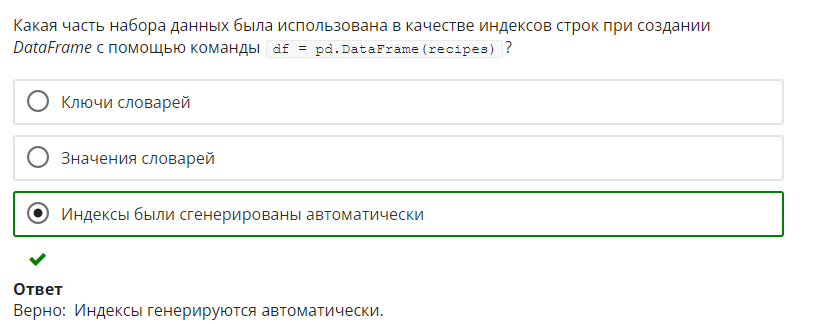

Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

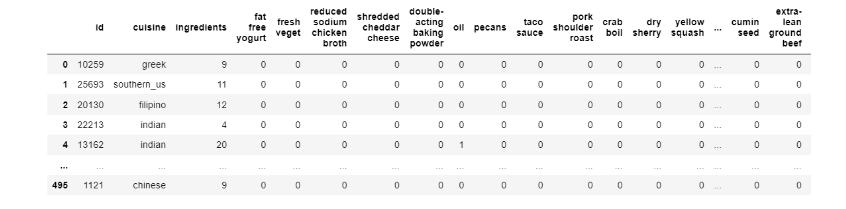

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1
Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2
Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.



In [11]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas

with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
    
all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
        all_ingredients.add(ingredient ) # Добавляем уникальный ингредиент в реестр
display(len(all_ingredients)) # Выводим на экран количество уникальных ингредиентов из реестра

1318

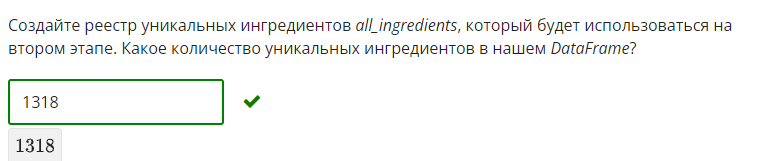

Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [12]:
def contains(ingredient_list): # Определяем имя функции и передаваемые аргументы
    if ingredient_name in ingredient_list: # Если ингредиент есть в текущем блюде,
        return 1 # возвращаем значение 1
    else: # Если ингредиента нет в текущем блюде,
        return 0 # возвращаем значение 0

Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

In [13]:
import warnings

In [14]:
for ingredient_name in all_ingredients: # Последовательно перебираем ингредиенты в реестре all_ingredients
    df[ingredient_name] = df['ingredients'].apply(contains) 
    # В DataFrame cоздаем столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains

<ipython-input-14-3fb5ad3cec3c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
<ipython-input-14-3fb5ad3cec3c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
<ipython-input-14-3fb5ad3cec3c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

In [15]:
df.head(2)

,id,cuisine,ingredients,green pepper,smoked gouda,rum,chicken,firmly packed brown sugar,cheese ravioli,low salt chicken broth,...,bacon,prawns,water chestnuts,cooked rice,cooked white rice,wakame,diced tomatoes,cooked quinoa,giardiniera,olive oil
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В завершение изменим значение столбца ingredients — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [16]:
df['ingredients'] = df['ingredients'].apply(len) # Заменяем список ингредиентов в рецепте на их количество 
display(df.head(2)) # Выводим содержимое полученного DataFrame на экран

,id,cuisine,ingredients,green pepper,smoked gouda,rum,chicken,firmly packed brown sugar,cheese ravioli,low salt chicken broth,...,bacon,prawns,water chestnuts,cooked rice,cooked white rice,wakame,diced tomatoes,cooked quinoa,giardiniera,olive oil
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Напишите код для создания списка ids всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок id должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл recipes.csv

In [21]:
import warnings

warnings.filterwarnings('ignore')

import json

with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
        all_ingredients.add(ingredient ) # Добавляем уникальный ингредиент в реестр
    
df = pd.DataFrame(recipes) # Создаем объект DataFrame из списка recipes

def contains(ingredient_list): # Определяем имя функции и передаваемые аргументы
    if ingredient_name in ingredient_list: # Если ингредиент есть в текущем блюде,
        return 1 # возвращаем значение 1
    else: # Если ингредиента нет в текущем блюде,
        return 0 # возвращаем значение 0
            
for ingredient_name in all_ingredients: # Последовательно перебираем ингредиенты в реестре all_ingredients
    df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаем столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains

df['ingredients'] = df['ingredients'].apply(len) # Заменяем список ингредиентов в рецепте, на их количество
 



In [27]:
ids=df.id.unique()
print(list(ids))

[10259, 25693, 20130, 22213, 13162, 6602, 42779, 3735, 16903, 12734, 5875, 45887, 2698, 41995, 31908, 24717, 34466, 1420, 2941, 8152, 13121, 40523, 40989, 29630, 49136, 26705, 27976, 22087, 9197, 1299, 40429, 34419, 10276, 33465, 39250, 37963, 20051, 11300, 17610, 37405, 28302, 31634, 32304, 36341, 29369, 27564, 18515, 3335, 4499, 4906, 5767, 30748, 35930, 44902, 31119, 3535, 47028, 38112, 2646, 5206, 38233, 39267, 11913, 20591, 70, 43928, 8530, 275, 43769, 49111, 11886, 45839, 699, 24568, 8820, 16582, 9058, 4715, 29061, 2107, 22825, 13758, 6886, 14874, 43399, 38254, 41596, 33989, 17004, 4969, 31831, 46648, 36888, 34471, 25164, 39600, 46357, 46905, 8753, 37337, 17636, 8997, 28851, 4635, 7782, 8031, 49434, 31318, 31027, 47095, 4574, 19757, 35570, 44812, 27858, 18624, 9406, 35132, 33071, 8321, 20955, 45776, 6043, 336, 25751, 793, 34367, 7406, 7473, 7532, 5924, 5802, 41078, 20665, 39471, 9595, 27869, 44776, 17771, 43970, 27165, 11190, 21872, 29853, 1154, 9069, 46975, 4892, 21467, 20919, 4

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [28]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().

Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

In [29]:
df = pd.read_csv('recipes.csv') # Создаём DataFrame, читаем данные из файла в переменную df

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов входящих в состав блюда.

✍️ Поскольку по условию задачи мы не можем использовать предыдущие наработки, давайте начнём с создания списка, содержащего перечень id всех блюд, а также списка ингредиентов, встречающихся в рецептах. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

Напишите код для создания списка id всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную ids.

In [30]:
df = pd.read_csv('recipes.csv')
ids = list(df['id'].unique())


Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную ingredients.

In [33]:
ingredients=list(df.columns)[3:]


 Отлично! Теперь мы можем использовать подготовленные списки ids и ingredients для непосредственного создания JSON-структуры.

После десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали:

целое число (id блюда);

строковая величина (тип кухни);

список строковых величин (перечень ингредиентов).

Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame.

Для этого необходимо создать:


пустой список new_recipes — для хранения итоговой структуры;

используя код из Задачи 7.1, список ids — для хранения id всех блюд;

используя код из Задачи 7.2, список ingredients — для хранения названий всех ингредиентов.


 Далее необходимо реализовать следующий алгоритм:

Написать код функции make_list(), которая принимает на вход строку DataFrame df, содержащую полные данные об одном блюде, и возвращает перечень ингредиентов, входящих в состав этого блюда в виде списка.

Организовать цикл с параметром, в котором будут перебираться элементы списка ids. В результате в процессе прохождения цикла параметр должен принять значение id каждого блюда.

На каждом шаге цикла создать словарь, содержащий три пары "ключ-значение":
ключу "id" присвоить текущее значение параметра цикла как целого числа;

ключу "cuisine" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему id к DataFrame df;

ключу "ingredients" присвоить значение списка, воспользовавшись функцией make_list(), созданной на первом шаге алгоритма.

Каждый созданный словарь добавить к списку new_recipes:

In [37]:
import warnings

warnings.filterwarnings('ignore')

In [34]:
def make_list(row): # Определяем имя функции и передаваемые аргументы
    ingredient_list=[] # Создаем пустой список ингредиентов текущего блюда
    for ingredient in ingredients: # Последовательно перебираем ингредиенты из реестра
        if row[ingredient].item()==1: # Если текущий ингредиент входит в состав текущего блюда
            ingredient_list.append(ingredient) # Добавляем ингредиент в список ингредиентов текущего блюда
    return ingredient_list # Возвращаем сформированный 

In [62]:
len(ids)==df.shape[0]

True

In [59]:
df[df['id'] == ids[101]]

,id,cuisine,ingredients,green pepper,smoked gouda,rum,chicken,firmly packed brown sugar,cheese ravioli,low salt chicken broth,...,bacon,prawns,water chestnuts,cooked rice,cooked white rice,wakame,diced tomatoes,cooked quinoa,giardiniera,olive oil
101,8997,japanese,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
df[df['id'] == ids[101]]['cuisine'].iloc[0]

'japanese'

In [65]:
make_list(df[df['id'] == ids[101]])

['rice flour',
 'vegetable oil',
 'club soda',
 'cayenne pepper',
 'salt',
 'seasoning salt',
 'garlic powder',
 'prawns']

In [35]:
new_recipes = [] # Создаём пустой список для хранения итоговой структуры
for current_id in ids: # Организуем цикл с параметром current_id
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;
    current_ingredients = make_list(df[df['id'] == current_id]) # Получаем перечень ингредиентов, входящих в состав текущего блюда
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} # Создаём текущий словарь
    new_recipes.append(current_recipe) # Добавляем созданный словарь к списку

In [67]:
new_recipes[:2]

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['garlic',
   'feta cheese crumbles',
   'black olives',
   'garbanzo beans',
   'grape tomatoes',
   'seasoning',
   'purple onion',
   'pepper',
   'romaine lettuce']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['eggs',
   'tomatoes',
   'vegetable oil',
   'salt',
   'ground pepper',
   'milk',
   'green tomatoes',
   'thyme',
   'plain flour',
   'ground black pepper',
   'yellow corn meal']}]

Напишите код функции make_list(), которая принимает на вход одну строку DataFrame, содержащую данные об одном рецепте, и возвращает перечень ингредиентов этого блюда в виде списка.

Функция make_list() должна принимать только один аргумент - row. Это будет строка датафрейма.

Не забудьте импортировать необходимые бибилиотеки, считать файл recipes.csv и создать список ingredients.

In [40]:
row = df.iloc[1]

In [41]:
row

id                      25693
cuisine           southern_us
ingredients                11
green pepper                0
smoked gouda                0
                     ...     
wakame                      0
diced tomatoes              0
cooked quinoa               0
giardiniera                 0
olive oil                   0
Name: 1, Length: 1321, dtype: object

In [50]:
type(row)

pandas.core.series.Series

In [36]:
def make_list(row): # Определяем имя функции и передаваемые аргументы
    ingredient_list=[] # Создаем пустой список ингредиентов текущего блюда
    for ingredient in ingredients: # Последовательно перебираем ингредиенты из реестра
        if row[ingredient].item()==1: # Если текущий ингредиент входит в состав текущего блюда
            ingredient_list.append(ingredient) # Добавляем ингредиент в список ингредиентов текущего блюда
    return ingredient_list # Возвращаем сформированный 

In [38]:
print(make_list(row = df.iloc[1]))

['eggs', 'tomatoes', 'vegetable oil', 'salt', 'ground pepper', 'milk', 'green tomatoes', 'thyme', 'plain flour', 'ground black pepper', 'yellow corn meal']


In [51]:
row["eggs"]

1

Выполним сериализацию списка new_recipes и запишем полученные данные в файл.

Для сериализации  используем функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл необходимо открыть для записи с помощью функции open() c параметром 'w' (от англ. write, рус. писать):

In [68]:
import json # Импорт модуля json
new_recipes = json.dumps(new_recipes) # Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
with open("new_recipes.json", "w") as write_file: # Откроем файл new_recipes.json для записи
    write_file.write(new_recipes) # Записываем содержимое подготовленные данные в файл

In [69]:
df = pd.read_json('new_recipes.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head()) #

,cuisine,id,ingredients
0,greek,10259,"[garlic, feta cheese crumbles, black olives, g..."
1,southern_us,25693,"[eggs, tomatoes, vegetable oil, salt, ground p..."
2,filipino,20130,"[soy sauce, eggs, green chilies, salt, cooking..."
3,indian,22213,"[wheat, water, vegetable oil, salt]"
4,indian,13162,"[water, passata, double cream, natural yogurt,..."


In [70]:
df = pd.read_json('recipes.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head()) #

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
